In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [280]:

def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax

In [281]:
flu_trends = pd.read_csv("selfstudy/study_data/flu-trends.csv")
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)


In [282]:
def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)

In [283]:
# Four weeks of lag features
y = flu_trends.FluVisits.copy()
X = make_lags(y, lags=4).fillna(0.0)


def make_multistep_target(ts, steps):
    return pd.concat(
        {f'y_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)


# Eight-week forecast
y = make_multistep_target(y, steps=8).dropna()

# Shifting has created indexes that don't match. Only keep times for
# which we have both targets and features.
y, X = y.align(X, join='inner', axis=0)

In [284]:
# Create splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

NameError: name 'LinearRegression' is not defined

Train RMSE: 389.12
Test RMSE: 582.33


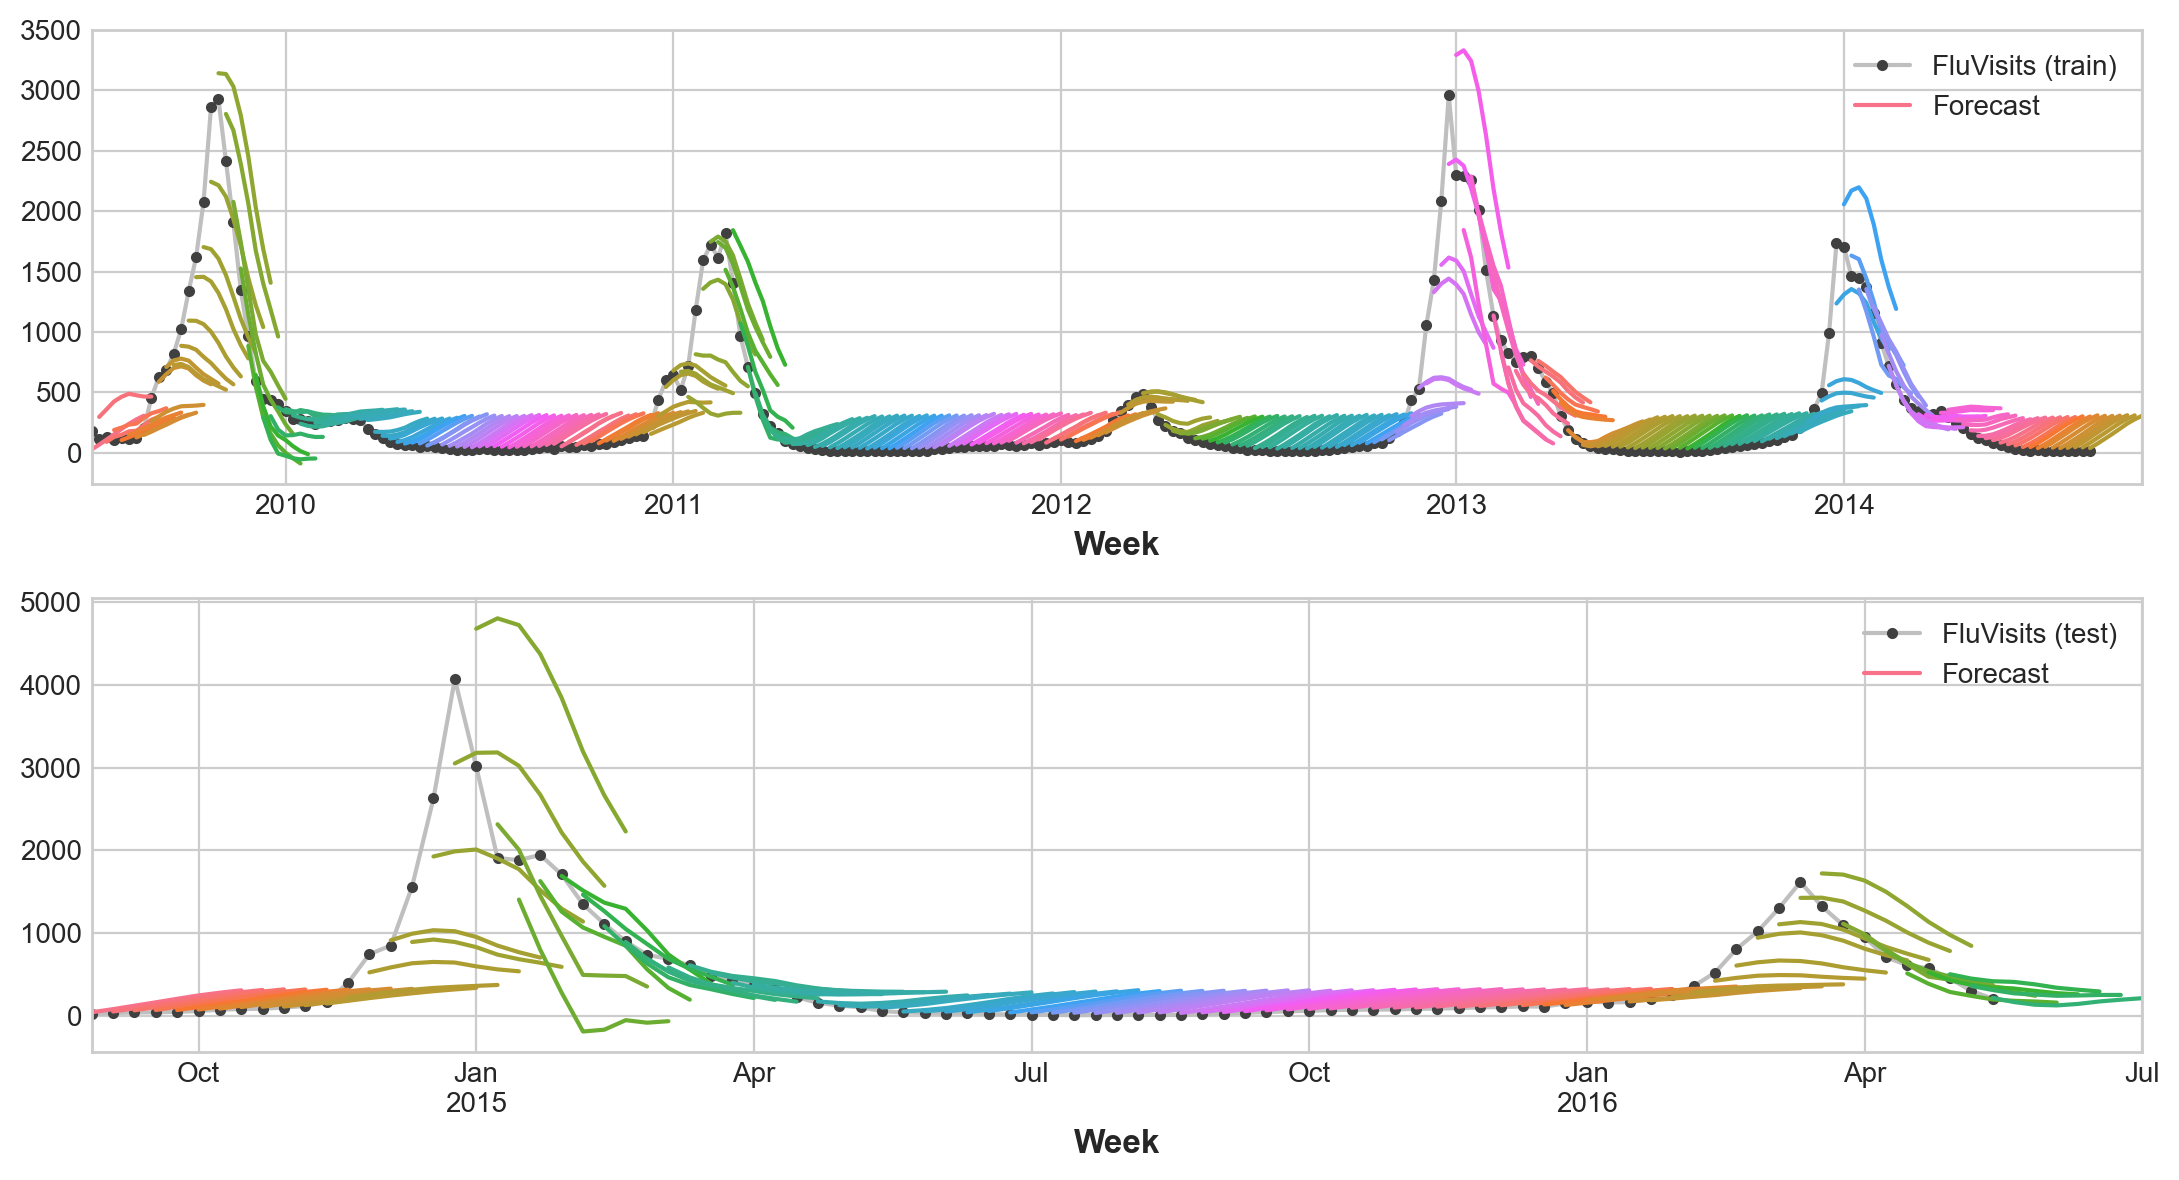

In [ ]:
train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

palette = dict(palette='husl', n_colors=64)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))
ax1 = flu_trends.FluVisits[y_fit.index].plot(**plot_params, ax=ax1)
ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
_ = ax1.legend(['FluVisits (train)', 'Forecast'])
ax2 = flu_trends.FluVisits[y_pred.index].plot(**plot_params, ax=ax2)
ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
_ = ax2.legend(['FluVisits (test)', 'Forecast'])

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(XGBRegressor())
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

Train RMSE: 1.19
Test RMSE: 494.52


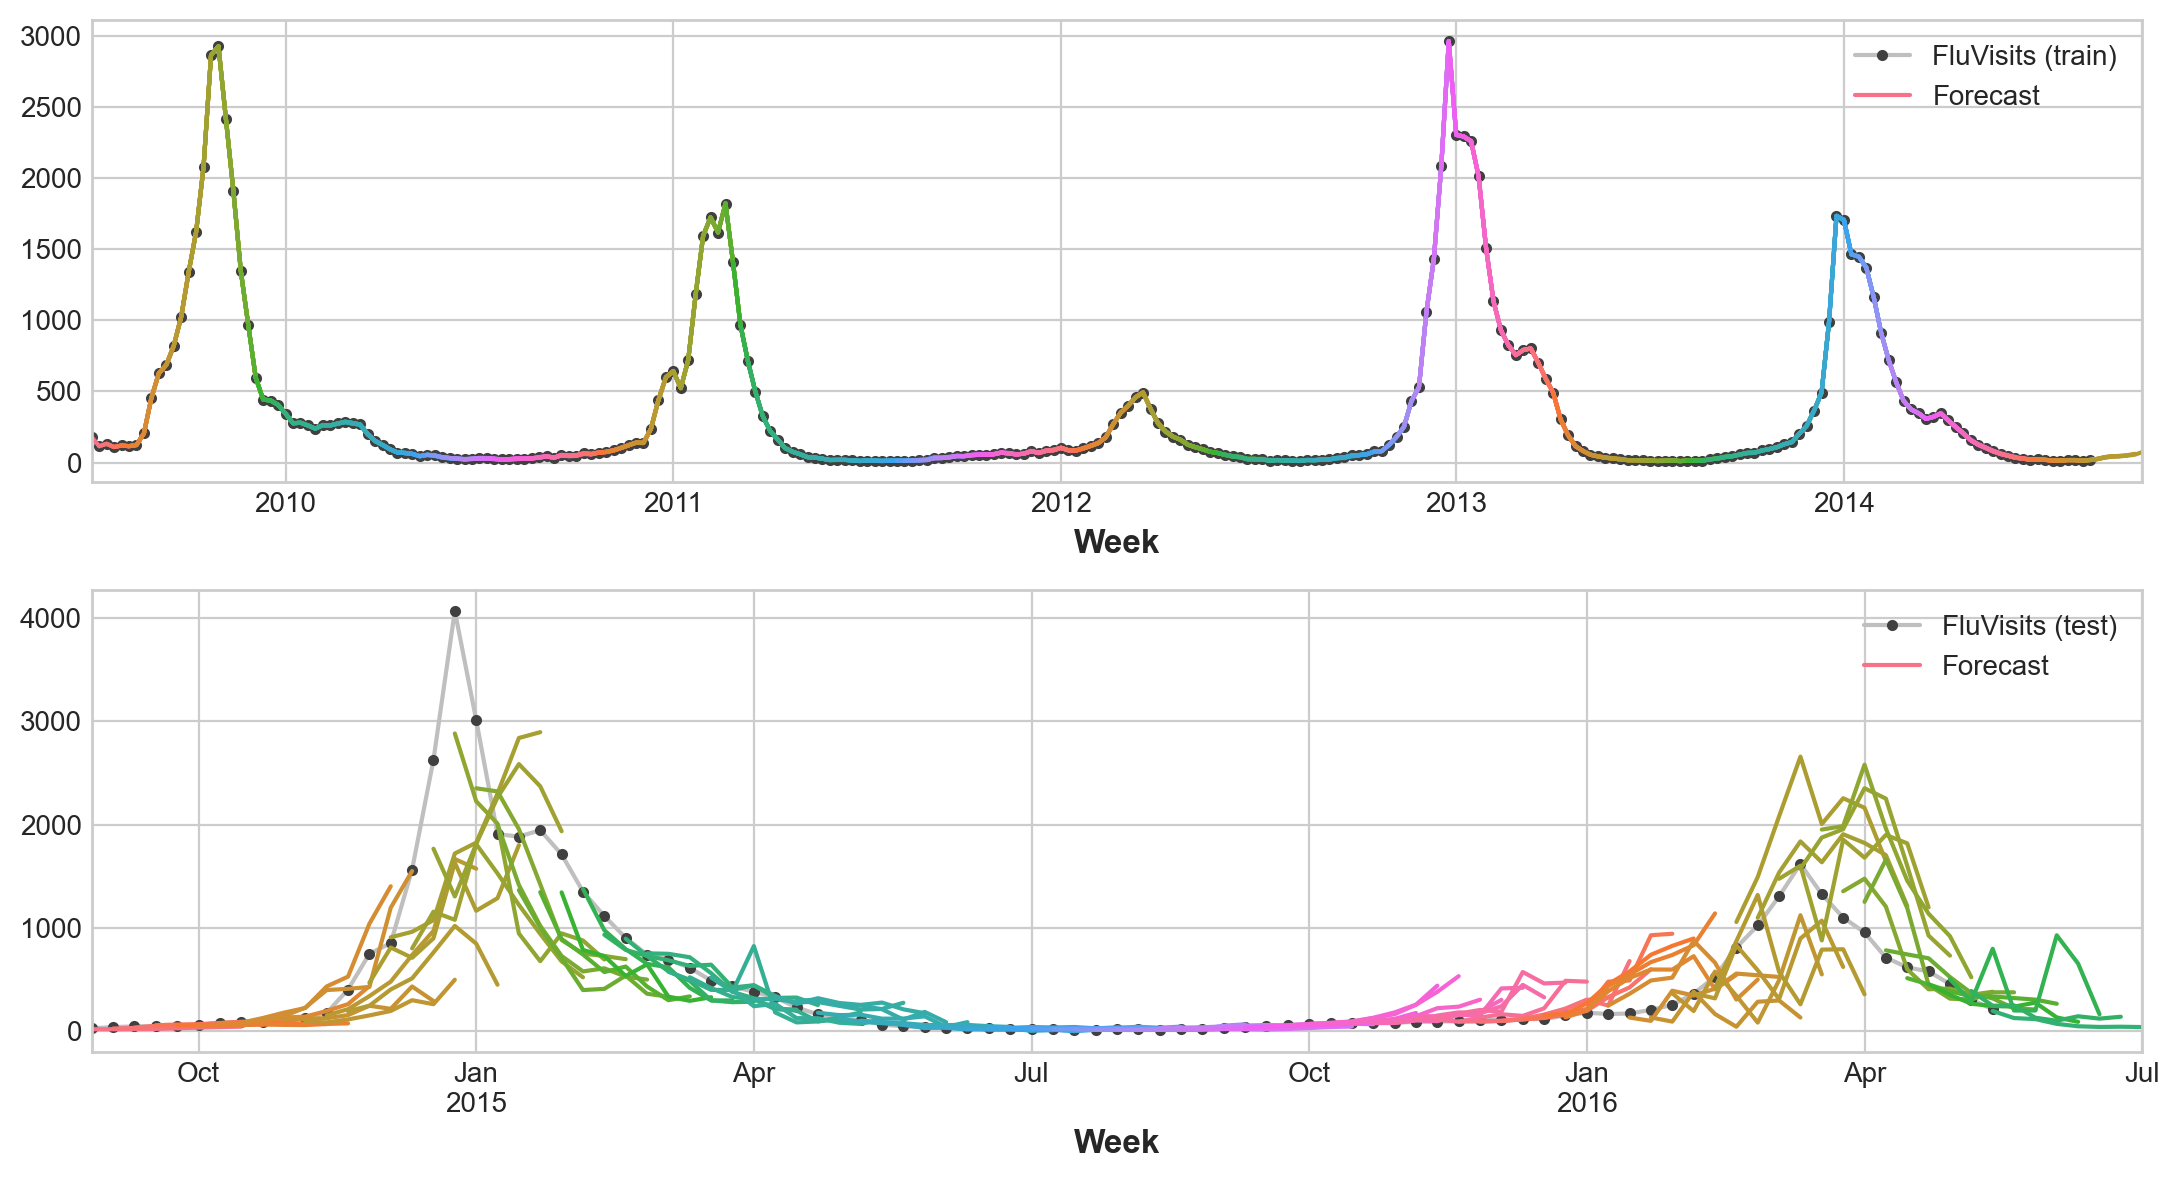

In [ ]:
train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

palette = dict(palette='husl', n_colors=64)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))
ax1 = flu_trends.FluVisits[y_fit.index].plot(**plot_params, ax=ax1)
ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
_ = ax1.legend(['FluVisits (train)', 'Forecast'])
ax2 = flu_trends.FluVisits[y_pred.index].plot(**plot_params, ax=ax2)
ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
_ = ax2.legend(['FluVisits (test)', 'Forecast'])

In [ ]:
import pandas as pd

pd.read_csv("13100252.csv", delimiter=';')["Réponse de l'étudiant(e)"].unique()

array(["Plus d'une fois par jour", 'Une fois par jour',
       'Au moins une fois par semaine, mais pas tous les jours',
       "Moins d'une fois par semaine", 'Jamais'], dtype=object)

In [ ]:
!pip install openpyxl

     ------------------------------------- 251.4/251.4 kB 16.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd

horse_run = pd.read_excel("한국마사회_경주상세정보(제주_부경)_20230720.xlsx")

In [ ]:
horse_run.columns = horse_run.loc[0]

In [ ]:
horse_run = horse_run.drop(index=0)

In [ ]:
horse_run.to_csv("horse_to.csv")

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import matplotlib
import sklearn

In [364]:
horse_run = pd.read_csv("horse_to.csv", index_col=0)
horse_run.loc[horse_run["착순"] > 1, "착순"] = 0

In [365]:
horse_run = horse_run.iloc[:,0:47]
horse_run.columns

Index(['경마장', '경주일자', '경주번호', '경주거리', '경주등급', '날씨', '주로상태(함수율)', '착순', '출주번호',
       '마명', '마번', '출신국가', '국산외산구분', '마필연령', '마필성별', '경주기록(초)', '경주마통산1착횟수',
       '경주마통산2착횟수', '경주마통산출전횟수', '경주마최근1년1착횟수', '경주마최근1년2착횟수', '경주마최근1년출전횟수',
       '마체중및증감', '부담중량', '기수명', '기수번호', '기수연령', '기수경력(년)', '기수통산1착횟수',
       '기수통산2착횟수', '기수통산출전횟수', '기수최근1년간1착횟수', '기수최근1년간2착횟수', '기수최근1년간출전횟수',
       '조교사명', '조교사번호', '조교사연령(비공개)', '조교사경력(년)', '조교사통산1착횟수', '조교사통산2착횟수',
       '조교사통산출전횟수', '조교사최근1년간1착횟수', '조교사최근1년간2착횟수', '조교사최근1년간출전횟수',
       '조교사위탁경주마1위횟수', '조교사위탁경주마2위횟수', '조교사위탁경주마출전횟수'],
      dtype='object')

In [366]:
horse_run = horse_run[["마필연령","경주거리","경주마최근1년2착횟수","기수경력(년)","부담중량","조교사경력(년)","착순"]]

In [367]:
## 데이터를 standard scaling 해보자

# 일단 인트값으로만 테스트 
horse_int = horse_run.select_dtypes("int")

sta = StandardScaler()
horse_scaling = sta.fit_transform(horse_int)

horse_pca = PCA(n_components = 2).fit_transform(horse_scaling)
pca_df = pd.DataFrame(data = horse_pca, columns=[0,1])

features = horse_int.columns

cmap = plt.cm.get_cmap('viridis', 41)


In [368]:
features.__len__()

4

In [ ]:
# # 그래프 그리기
# plt.figure(figsize=(8, 6))
# for i, (x, y) in enumerate(zip(pca_df[0], pca_df[1])):
#     plt.scatter(x, y, cmap=[i], edgecolor='k')  # 레이블은 일부만 표시

# plt.title('PCA of Horse Run Data')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.grid(True)
# plt.show()

In [374]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

x_data = horse_int.drop(columns="착순")
y_data = horse_int["착순"]

x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.30,
                                                    random_state = 97)

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

pred = model.predict(x_test)
print("정확도",metrics.accuracy_score(pred, y_test))
print("r2 스코어",r2_score(y_test, pred))

model.feature_importances_

정확도 0.9063092479460712
r2 스코어 -0.11633611144599332


array([0.41627164, 0.19010714, 0.39362122])

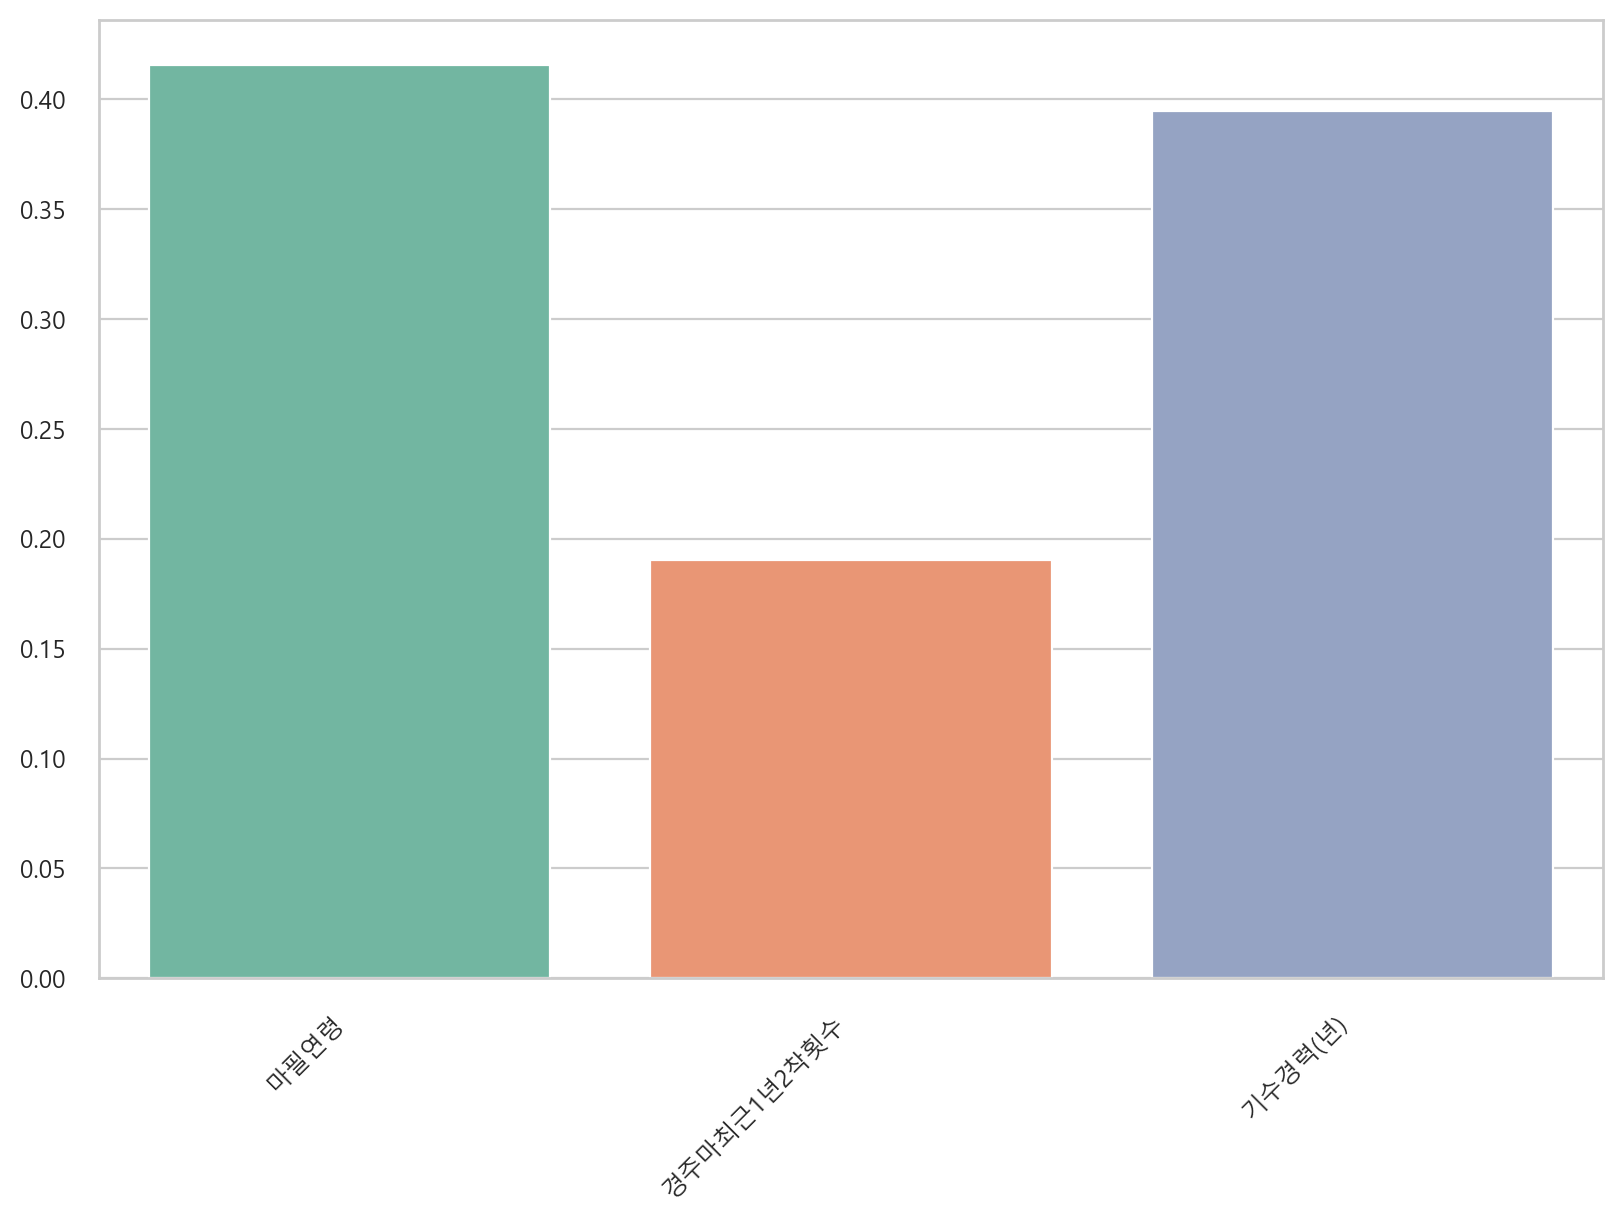

In [370]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x=x_data.columns, y=model.feature_importances_, ax= ax)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45);